In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

## Load Data

In [47]:
# load the original data
survey = pd.read_csv('data_corrected/preprocessed.csv')
survey.head()

,Unnamed: 0,timestamp,gender,age,language,EQ_score_raw,SQ_score_raw,EQ_score_std,SQ_score_std,D_score,...,covid_6,covid_7,covid_8,covid_9,covid_10,covid_11,covid_12,covid_13,covid_14,covid_15
0,0,2020/05/03 6:49:52 am GMT+8,M,23,English,8.0,11.0,-0.071329,0.200699,-0.272028,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,2.0,3.0
1,1,2020/05/03 6:53:20 am GMT+8,M,22,English,7.0,4.0,-0.121329,-0.149301,0.027972,...,1.0,4.0,Yes,Yes,Yes,No,Yes,Yes,2.0,3.0
2,2,2020/05/03 3:53:12 pm GMT+8,F,22,English,9.0,8.0,-0.021329,0.050699,-0.072028,...,2.0,5.0,Yes,Yes,Yes,No,Yes,No,1.0,1.0
3,3,2020/05/03 7:35:55 pm GMT+8,M,28,English,6.0,10.0,-0.171329,0.150699,-0.322028,...,1.0,5.0,Yes,Yes,Yes,Yes,Yes,No,2.0,3.0
4,4,2020/05/03 8:38:20 pm GMT+8,M,32,English,5.0,0.0,-0.221329,-0.349301,0.127972,...,1.0,5.0,No,No,No,No,Yes,No,1.0,3.0


## Q1. Is there a difference between attributing pain in the egocentric versus the allocentric conditions?

Average EA score: -1.0650533512464029e-16
STD EA score: 1.2596358776307823
Max EA score: 3.6909264949653577
Min EA score: -4.866151746445935


Text(0.5, 1.0, 'EA Score Histogram')

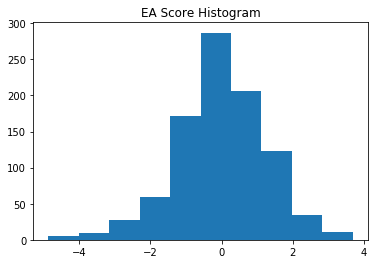

In [49]:
ea = survey['EA_score']
plt.hist(ea)
print("Average EA score: {0}".format(np.mean(ea.values)))
print("STD EA score: {0}".format(np.std(ea.values)))
print("Max EA score: {0}".format(np.max(ea.values)))
print("Min EA score: {0}".format(np.min(ea.values)))
plt.title('EA Score Histogram')

Average E score: 5.5564775160599575
STD E score: 2.228924206143439
Average A score: 3.6247323340471094
STD A score: 2.262449186217868


Text(0.5, 1.0, 'Egocentric and Allocentric Score Distributions')

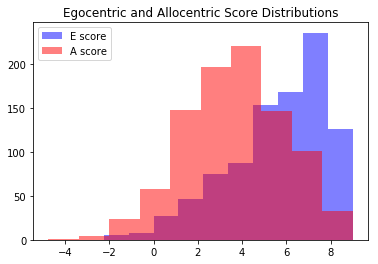

In [50]:
e_raw = survey['E_score_raw']
a_raw = survey['A_score_raw']
plt.hist(e_raw, color='blue', alpha=0.5, label='E score')
plt.hist(a_raw, color='red', alpha=0.5, label='A score')
print("Average E score: {0}".format(np.mean(e_raw.values)))
print("STD E score: {0}".format(np.std(e_raw.values)))
print("Average A score: {0}".format(np.mean(a_raw.values)))
print("STD A score: {0}".format(np.std(a_raw.values)))
plt.legend()
plt.title('Egocentric and Allocentric Score Distributions')

In [51]:
t, pval = scipy.stats.ttest_rel(e_raw, a_raw)
print(pval)

1.547071338592345e-79


Conclusion: While the average EA score is about zero, the values vary from -5 to almost 4, which are large variations between egocentric and allocentric conditions. When we plot the egocentric and allocentric scores, we see that the A scores tend to be lower than the E scores. This difference is siginificant when we perform a paired 2-sample t-test.

## Q2. Does this difference vary by age, gender and language?

### Gender

(array([  3.,   6.,  17.,  32., 112., 155., 115.,  71.,  23.,   8.]),
 array([-4.86615175, -4.01044392, -3.1547361 , -2.29902827, -1.44332045,
        -0.58761263,  0.2680952 ,  1.12380302,  1.97951085,  2.83521867,
         3.69092649]),
 <a list of 10 Patch objects>)

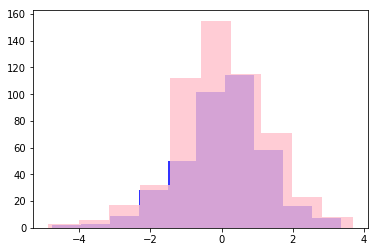

In [52]:
men_ea  = survey[survey['gender']=='M']['EA_score']
women_ea  = survey[survey['gender']=='F']['EA_score']
plt.hist(men_ea,color='blue',alpha=0.8)
plt.hist(women_ea,color='pink',alpha=0.8)

In [53]:
print("Average EA score for men: {0}".format(np.mean(men_ea.values)))
print("Average EA score for women: {0}".format(np.mean(women_ea.values)))

Average EA score for men: 0.015686125401676267
Average EA score for women: -0.003442399267029408


In [54]:
t, pval = scipy.stats.ttest_ind(men_ea, women_ea)
print(pval)

0.8191074848014204


Conclusion: No significant difference between EA score of men and women

### Language

In [55]:
en_ea  = survey[survey['language']=='English']['EA_score']
fr_ea  = survey[survey['language']=='French']['EA_score']
tu_ea  = survey[survey['language']=='Turkish']['EA_score']
ch_ea  = survey[survey['language']=='Chinese']['EA_score']

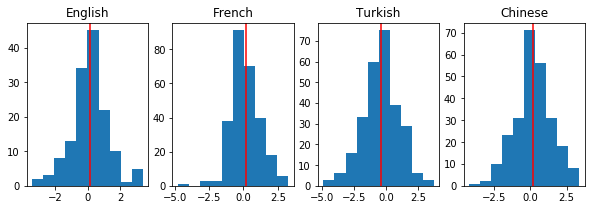

In [56]:
fig, axs = plt.subplots(1,4, figsize=(10,3))
axs[0].hist(en_ea)
axs[0].axvline(np.mean(en_ea),0,40, color='r')
axs[0].set_title('English')
axs[1].hist(fr_ea)
axs[1].axvline(np.mean(fr_ea),0,80, color='r')
axs[1].set_title('French')
axs[2].hist(tu_ea)
axs[2].set_title('Turkish')
axs[2].axvline(np.mean(tu_ea),0,70, color='r')
axs[3].hist(ch_ea)
axs[3].set_title('Chinese')
axs[3].axvline(np.mean(ch_ea),0,70, color='r')

In [57]:
print("English mean: {0}".format(np.mean(en_ea)))
print("English std: {0}".format(np.std(en_ea)))
print("French mean: {0}".format(np.mean(fr_ea)))
print("French std: {0}".format(np.std(fr_ea)))
print("Turkish mean: {0}".format(np.mean(tu_ea)))
print("Turkish std: {0}".format(np.std(tu_ea)))
print("Chinese mean: {0}".format(np.mean(ch_ea)))
print("Chinese std: {0}".format(np.std(ch_ea)))

English mean: 0.12253616931322582
English std: 1.1154485845148607
French mean: 0.1556019230981317
French std: 1.061153985381049
Turkish mean: -0.4213108892458712
Turkish std: 1.3919449002236304
Chinese mean: 0.216010950789236
Chinese std: 1.2758162330346263


#### Turkish vs others

In [58]:
t, pval = scipy.stats.ttest_ind(en_ea, tu_ea)
print(pval)

6.750039696300751e-05


Conclusion: There is a significant difference in the EA scores of English and Turkish speakers, with Turkish people being more allocentric than egocentric

In [59]:
t, pval = scipy.stats.ttest_ind(fr_ea, tu_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(ch_ea, tu_ea)
print(pval)

9.704698722686242e-08
8.89771397621511e-08


Conclusion: Turkish people are significantly more allocentric than English, French, and Chinese people

#### English vs others

In [60]:
t, pval = scipy.stats.ttest_ind(en_ea, fr_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(en_ea, tu_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(en_ea, ch_ea)
print(pval)

0.767962332205818
6.750039696300751e-05
0.46619017896205583


#### French vs others

In [61]:
t, pval = scipy.stats.ttest_ind(fr_ea, en_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(fr_ea, tu_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(fr_ea, ch_ea)
print(pval)

0.767962332205818
9.704698722686242e-08
0.5567980257071952


#### Chinese vs others

In [62]:
t, pval = scipy.stats.ttest_ind(ch_ea, fr_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(ch_ea, tu_ea)
print(pval)
t, pval = scipy.stats.ttest_ind(ch_ea, en_ea)
print(pval)

0.5567980257071952
8.89771397621511e-08
0.46619017896205583


Conclusion: The only significant language difference is that Turkish people are more allocentric than English, French, and Chinese people.

### Age

In [63]:
oldness_cutoff = 35
young_ea  = survey[survey['age']<oldness_cutoff]['EA_score']
old_ea  = survey[survey['age']>=oldness_cutoff]['EA_score']
print("Old mean: {0}".format(np.mean(old_ea)))
print("Young mean: {0}".format(np.mean(young_ea)))
t, pval = scipy.stats.ttest_ind(young_ea, old_ea)
print(pval)

Old mean: -0.0904100878279177
Young mean: 0.11605206872776688
0.0129187507810094


Conclusion: People over 35 are more allocentric than those under 35

In [64]:
for oldness_cutoff in [20, 25, 30, 35, 40, 45]:
    young_ea  = survey[survey['age']<oldness_cutoff]['EA_score']
    old_ea  = survey[survey['age']>=oldness_cutoff]['EA_score']
    print('\t Oldness cutoff: {0}'.format(oldness_cutoff))
    print("Old mean: {0}".format(np.mean(old_ea)))
    print("Young mean: {0}".format(np.mean(young_ea)))
    t, pval = scipy.stats.ttest_ind(young_ea, old_ea)
    print(pval)

	 Oldness cutoff: 20
Old mean: -0.0033228888054457374
Young mean: 0.06271068873256123
0.7265071850155026
	 Oldness cutoff: 25
Old mean: -0.061286408669400765
Young mean: 0.1515072928072541
0.01937670028646744
	 Oldness cutoff: 30
Old mean: -0.0986326097908923
Young mean: 0.16532973274404544
0.001921662618784255
	 Oldness cutoff: 35
Old mean: -0.0904100878279177
Young mean: 0.11605206872776688
0.0129187507810094
	 Oldness cutoff: 40
Old mean: -0.07601769496123766
Young mean: 0.07283037022491703
0.07116428939544792
	 Oldness cutoff: 45
Old mean: -0.04419162914754833
Young mean: 0.029382313140883052
0.38251616436782043


-> Best oldness cutoff is 30

In [65]:
oldness_cutoff = 30
nb_old = len(survey[survey['age']>=oldness_cutoff])
print("Percentage of people older than {0} : {1} %".format(oldness_cutoff, nb_old * 100 / len(survey)))

Percentage of people older than 30 : 62.6338329764454 %


Conclusion: People over 30 are more allocentric than those under 30 with p = 0.002

## Q3. Is there a relationship between D score and scores on the scores on  the egocentric and allocentric conditions.  
EA Score = Egocentric score - allocentric score

(934,)
(934,)


Text(0.5, 1.0, 'EA Score vs D-Score Correlation')

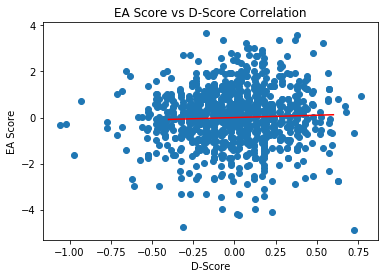

In [66]:
d_score = survey['D_score'].values
print(d_score.shape)
ea_score = survey['EA_score'].values
print(ea_score.shape)
plt.figure()
plt.scatter(d_score,ea_score)
plt.xlabel("D-Score")
plt.ylabel("EA Score")
result = scipy.stats.linregress(d_score, ea_score)
x = np.linspace(-0.4,0.6,300)
y = result.slope*x + result.intercept
plt.plot(x,y,color='red')
plt.title("EA Score vs D-Score Correlation")

In [68]:
print(result.rvalue)
print(result.pvalue)

0.04426164403866631
0.1765195298313177


Conclusion: No correlation between D-score and EA score

(934,)
(934,)


Text(0.5, 1.0, 'Raw E Score vs D-Score Correlation')

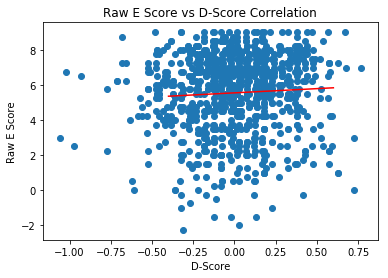

In [69]:
d_score = survey['D_score'].values
print(d_score.shape)
e_score = survey['E_score_raw'].values
print(e_score.shape)
plt.figure()
plt.scatter(d_score,e_score)
plt.xlabel("D-Score")
plt.ylabel("Raw E Score")
result = scipy.stats.linregress(d_score, e_score)
x = np.linspace(-0.4,0.6,300)
y = result.slope*x + result.intercept
plt.plot(x,y,color='red')
plt.title("Raw E Score vs D-Score Correlation")

In [70]:
print(result.rvalue)
print(result.pvalue)

0.0591028562403513
0.07100798800611723


Conclusion: No siginificant correlation between D-score and raw E score.

Text(0.5, 1.0, 'Raw A Score vs D-Score Correlation')

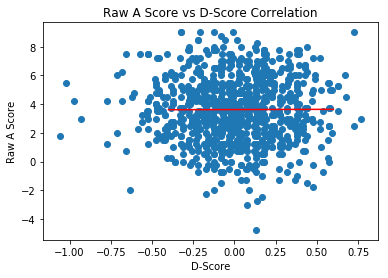

In [71]:
d_score = survey['D_score'].values
a_score = survey['A_score_raw'].values
plt.figure()
plt.scatter(d_score,a_score)
plt.xlabel("D-Score")
plt.ylabel("Raw A Score")
result = scipy.stats.linregress(d_score, a_score)
x = np.linspace(-0.4,0.6,300)
y = result.slope*x + result.intercept
plt.plot(x,y,color='red')
plt.title("Raw A Score vs D-Score Correlation")

In [72]:
print(result.rvalue)
print(result.pvalue)

0.003319430761356041
0.9193036455820172


Conclusion: No Siginificant correlation between D-score and raw A score.

## Check correlation between age and EA score / D-score

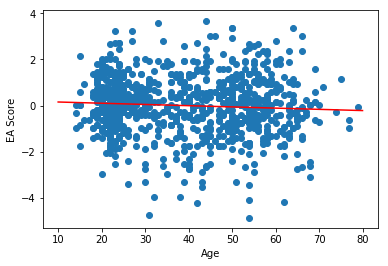

In [73]:
ages = survey['age'].to_numpy()
plt.figure()
plt.scatter(ages,ea_score)
plt.xlabel("Age")
plt.ylabel("EA Score")
result = scipy.stats.linregress(ages, ea_score)
x = np.linspace(10,80,300)
y = result.slope*x + result.intercept
plt.plot(x,y,color='red')

In [74]:
print(result.rvalue)
print(result.pvalue)

-0.06398527064015834
0.05059899920687028


Conclusion: No siginificant negative correlation between age and EA score

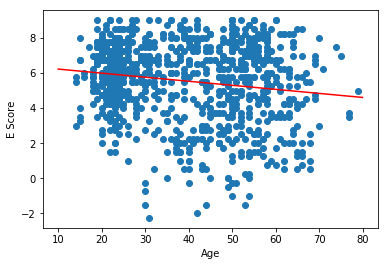

In [75]:
ages = survey['age'].to_numpy()
plt.figure()
plt.scatter(ages,e_score)
plt.xlabel("Age")
plt.ylabel("E Score")
result = scipy.stats.linregress(ages, e_score)
x = np.linspace(10,80,300)
y = result.slope*x + result.intercept
plt.plot(x,y,color='red')

In [76]:
print(result.rvalue)
print(result.pvalue)

-0.1572699556558919
1.3650351294342671e-06


Conclusion: Significant negative correlation between age and E score

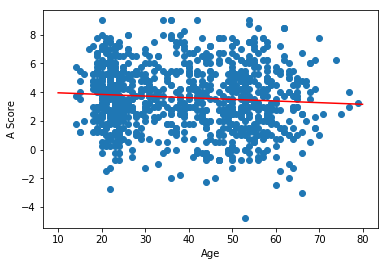

In [77]:
a_score = survey['A_score_raw'].to_numpy()
ages = survey['age'].to_numpy()
plt.figure()
plt.scatter(ages,a_score)
plt.xlabel("Age")
plt.ylabel("A Score")
result = scipy.stats.linregress(ages, a_score)
x = np.linspace(10,80,300)
y = result.slope*x + result.intercept
plt.plot(x,y,color='red')

In [78]:
print(result.rvalue)
print(result.pvalue)

-0.0766286316826903
0.019171071678866915


Conclusion: A score also significantly decreases with age.

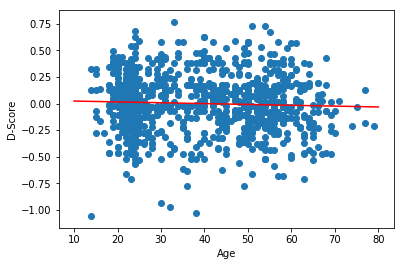

In [79]:
plt.figure()
plt.scatter(ages,d_score)
plt.xlabel("Age")
plt.ylabel("D-Score")
result = scipy.stats.linregress(ages, d_score)
x = np.linspace(10,80,300)
y = result.slope*x + result.intercept
plt.plot(x,y,color='red')

In [80]:
print(result.rvalue)
print(result.pvalue)

-0.04392708651888617
0.17981542638869427


Conclusion: No Significant correlation between age and D-score

## Q4. Is there a relationship between  egocentric/allocentric empathy and responses on the COVID-19 questions?

### Numeric answers: Compute correlation and find questions with p<0.05

In [81]:
#EA score
numeric_covid_answers = [1,2,3,4,5,6,7,14,15]
for num in numeric_covid_answers:
    key = 'covid_' + str(num)
    data = survey[key]
    result = scipy.stats.linregress(ea_score, data)
    if result.pvalue < 0.05:
        print("Question {0} siginificantly correlated to EA with r-value {1} and p-value {2}".format(num,result.rvalue,result.pvalue))

Question 14 siginificantly correlated to EA with r-value -0.0895004203793535 and p-value 0.006198513875190229


Conclusion: EA score has a significant negative correlation to people's willingness to deliver groceries to a sick friend or family member.

In [82]:
#Raw E score
numeric_covid_answers = [1,2,3,4,5,6,7,14,15]
for num in numeric_covid_answers:
    key = 'covid_' + str(num)
    data = survey[key]
    result = scipy.stats.linregress(survey['E_score_raw'].values, data)
    if result.pvalue < 0.05:
        print("Question {0} siginificantly correlated to Raw E with r-value {1} and p-value {2}".format(num,result.rvalue,result.pvalue))

Question 1 siginificantly correlated to Raw E with r-value -0.09269620733583678 and p-value 0.004579130064883244
Question 6 siginificantly correlated to Raw E with r-value 0.08849269854435739 and p-value 0.006806812197756953
Question 14 siginificantly correlated to Raw E with r-value -0.1156106644717565 and p-value 0.0003995644529759807


Conclusion: Raw score has a significant positive correlation to people being worried about COVID and feeling that those arough them are following social distancing. It has a significant negative correlation to people's willingness to deliver groceries to a sick friend or family member.

In [83]:
#Raw A score
numeric_covid_answers = [1,2,3,4,5,6,7,14,15]
for num in numeric_covid_answers:
    key = 'covid_' + str(num)
    data = survey[key]
    result = scipy.stats.linregress(survey['A_score_raw'].values, data)
    if result.pvalue < 0.05:
        print("Question {0} siginificantly correlated to raw A with r-value {1} and p-value {2}".format(num,result.rvalue,result.pvalue))

Question 3 siginificantly correlated to raw A with r-value -0.07832650330542805 and p-value 0.016654749168705258
Question 7 siginificantly correlated to raw A with r-value 0.09458373213093185 and p-value 0.003813020958753563


Conclusion: A scores have a significant positive correlation to feeling that SD measures are too strict, and significant negative correlation to being more concerned for society than for oneself. This makes no sense..

In [84]:
numeric_covid_answers = [1,2,3,4,5,6,7,14,15]
for num in numeric_covid_answers:
    key = 'covid_' + str(num)
    data = survey[key]
    result = scipy.stats.linregress(d_score, data)
    if result.pvalue < 0.05:
        print("Question {0} siginificantly correlated to D-score with r-value {1} and p-value {2}".format(num,result.rvalue,result.pvalue))

Question 1 siginificantly correlated to D-score with r-value -0.09515924488438605 and p-value 0.0036037275949163954
Question 7 siginificantly correlated to D-score with r-value 0.07948563196026118 and p-value 0.015107762152802408


Conclusion:

D-score has a negative correlation to people feeling concerned about the COVID pandemic.

D-score is correlated to thinking that the social and physical distancing rules set in place by the local government are too strict. 

### True/False questions: Compute p-values between scores of "yes" and "no" answers and find questions for which p<0.05

In [85]:
#EA score
tf_covid_answers = np.array(range(9,14))
for num in tf_covid_answers:
    key = 'covid_' + str(num)
    yes_ea  = survey[survey[key]=='Yes']['EA_score']
    no_ea  = survey[survey[key]=='No']['EA_score']
    t, pval = scipy.stats.ttest_ind(yes_ea, no_ea)
    if pval < 0.05:
        print("Question {0} p-val {1}".format(num,pval))
        print("Yes mean: {0}".format(np.mean(yes_ea)))
        print("No mean: {0}".format(np.mean(no_ea)))

Question 9 p-val 0.003085762607366605
Yes mean: -0.07870666267860424
No mean: 0.1886097843825457
Question 10 p-val 0.00302335482336716
Yes mean: -0.07704746947378598
No mean: 0.19348763010710118
Question 12 p-val 0.005734448849122712
Yes mean: -0.0391791995499486
No mean: 0.3304508244869397


Conclusion: People who do not wear masks (Q 9-10) and do not wash their hands when coming home (Q 12) have significantly higher EA scores than those who do.

In [86]:
#E score
tf_covid_answers = np.array(range(9,14))
for num in tf_covid_answers:
    key = 'covid_' + str(num)
    yes_ea  = survey[survey[key]=='Yes']['E_score_raw']
    no_ea  = survey[survey[key]=='No']['E_score_raw']
    t, pval = scipy.stats.ttest_ind(yes_ea, no_ea)
    if pval < 0.05:
        print("Question {0} p-val {1}".format(num,pval))
        print("Yes mean: {0}".format(np.mean(yes_ea)))
        print("No mean: {0}".format(np.mean(no_ea)))

Question 9 p-val 0.0028695408449115473
Yes mean: 5.416160849772383
No mean: 5.892727272727273
Question 10 p-val 6.019792242703555e-05
Yes mean: 5.372380239520958
No mean: 6.018796992481203


Conclusion: People who do not wear masks have significantly higher E scores

In [87]:
# Wear mask to:            Protect yourself         Protect others
yes_ea  = survey[(survey['covid_9']=='No') & (survey['covid_10']=='Yes')]['EA_score']
no_ea  = survey[(survey['covid_9']=='Yes') & (survey['covid_10']=='No')]['EA_score']
t, pval = scipy.stats.ttest_ind(yes_ea, no_ea)
print("Yes mean: {0}".format(np.mean(yes_ea)))
print("No mean: {0}".format(np.mean(no_ea)))
print(pval)

Yes mean: 0.22205967543736968
No mean: 0.2540307950818737
0.8903112079729545


Conclusion: No significant difference between EA scores of people who wear masks to protect others and not themselves vs people who wear masks to protect themselves but not others.

In [88]:
# Wash hands:             Leaving home             Coming home
yes_ea  = survey[(survey['covid_11']=='Yes') & (survey['covid_12']=='Yes')]['EA_score']
no_ea  = survey[(survey['covid_11']=='No') & (survey['covid_12']=='Yes')]['EA_score']
t, pval = scipy.stats.ttest_ind(yes_ea, no_ea)
print("Yes mean: {0}".format(np.mean(yes_ea)))
print("No mean: {0}".format(np.mean(no_ea)))
print(pval)

Yes mean: -0.07744570777312447
No mean: 0.0190876286811105
0.2791021503238132


No significant difference in EA scores of people who always wash their hands and those who only wash their hands when coming home.

## Covid question and age correlation

In [89]:
numeric_covid_answers = [1,2,3,4,6,7,14,15]
for num in numeric_covid_answers:
    key = 'covid_' + str(num)
    data = survey[key]
    result = scipy.stats.linregress(ages, data)
    if result.pvalue < 0.05:
        print("Question {0} siginificantly correlated to age with r-value {1} and p-value {2}".format(num,result.rvalue,result.pvalue))

Question 1 siginificantly correlated to age with r-value -0.1039321947824742 and p-value 0.0014693056686866503
Question 4 siginificantly correlated to age with r-value -0.12961782525093649 and p-value 7.104176240232298e-05
Question 7 siginificantly correlated to age with r-value -0.258922825661193 and p-value 8.987621734305648e-16
Question 14 siginificantly correlated to age with r-value 0.1420300563177903 and p-value 1.318983633962847e-05
Question 15 siginificantly correlated to age with r-value 0.16376071975598522 and p-value 4.852255397522798e-07


Conclusion: Age is positively correlated to cencern for COVID and willingness to deliver groceries to a sick person. It is negatively correlated to respecting social distancing and thinking regulations are too strict.

## Try ML Stuff

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [91]:
data_matrix = survey[['gender','age','language','D_score','EA_score']]
labels = (survey['covid_9']=='Yes') | (survey['covid_10']=='Yes') #Whether or not people wear masks
#labels = (survey['covid_11']=='Yes') & (survey['covid_12']=='Yes') #Whether or not people wash hands
#labels = (survey['covid_9']=='Yes')
#labels = (survey['covid_15']>2) & (survey['covid_14']>2) #delivering groceries to sick person
sum(labels==1)

718

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_matrix.loc[data_matrix['language']=='English', 'language'] = 0
data_matrix.loc[data_matrix['language']=='French', 'language'] = 1
data_matrix.loc[data_matrix['language']=='Turkish', 'language'] = 2
data_matrix.loc[data_matrix['language']=='Chinese', 'language'] = 3
data_matrix.loc[data_matrix['gender']=='M', 'gender'] = 0
data_matrix.loc[data_matrix['gender']=='F', 'gender'] = 1
data_matrix.loc[data_matrix['gender']=='O', 'gender'] = 2
data_matrix = scaler.fit_transform(data_matrix.to_numpy())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [93]:
X = data_matrix
y = labels.to_numpy()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [95]:
clf.score(X_test, y_test)

0.8025889967637541

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show() 

AUC Score: 0.8771452242868978


Text(0, 0.5, 'True Positive Rate')

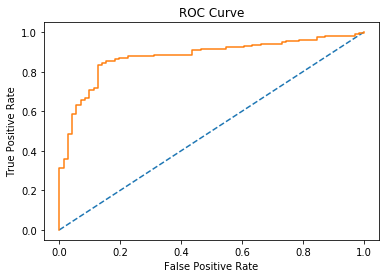

In [488]:
from sklearn.metrics import roc_auc_score, roc_curve
y_scores = clf.decision_function(X_test)
print("AUC Score: {0}".format(roc_auc_score(y_test, y_scores)))
fpr, tpr, thr = roc_curve(y_test, y_scores)
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

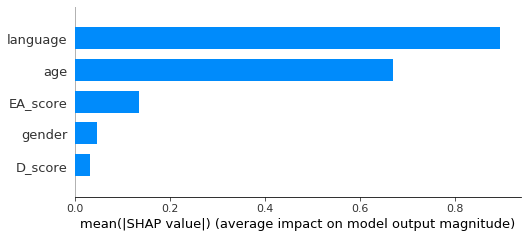

In [489]:
import shap
feature_names = ['gender','age','language','D_score','EA_score']
shap_values = shap.LinearExplainer(clf, X_train).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

Conclusion: We can use ML to predict whether or not people wear masks (AUC=87.7), but people's age and language are much more important factors than empathy metrics like EA score or D-score